Code to run: 

You could run this to get background sequences:
`python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/test-variants-ref.py /datacommons/igvf-pm/A549/full-set/Dex-200 /datacommons/igvf-pm/A549/GR-AP1/ref-seq/Dex-200/chr1.txt /datacommons/igvf-pm/A549/GR-AP1/ref-score/Dex-200/chr1.txt`
It will compute the reference score for each background sequence by using our trained model.
 
I selected 50 sequences which have the lowest reference score and inserted GR and AP1 into the selected background sequences to build the enhancer sequences. I fixed AP1 at position 10 and move GR away from AP1 for a certain distance. Here is the script which can do this:
`python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/GR-AP1/enhancer_seq.py /datacommons/igvf-pm/A549/GR-AP1/ref-score/Dex-200 /datacommons/igvf-pm/A549/GR-AP1/enhancer-seq/generated-seq 50 10`
 
This is how I compute the fold change. The log2FC here was defined as reference score from Dex - reference score from DMSO.
`python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/test-variants-fc.py /datacommons/igvf-pm/A549/full-set/DMSO-200 /datacommons/igvf-pm/A549/full-set/Dex-200 /datacommons/igvf-pm/A549/GR-AP1/enhancer-seq/generated-seq/chr1-b-ap1-b-gr.txt /datacommons/igvf-pm/A549/GR-AP1/enhancer-seq/fc-full/Dex-DMSO/chr1-b-ap1-b-gr-fc.txt`
 
`/datacommons/igvf-pm/A549/GR-AP1/plot.R` is the R script to make the plots.


Conda env to use: `conda activate /hpc/home/bmajoros/lab/conda/TF4`

In [4]:
#SBATCH --get-user-env
#SBATCH -J fc
#SBATCH -o /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/GR-AP1/slurm/outputs/%a.out
#SBATCH -e /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/GR-AP1/slurm/outputs/%a.err
#SBATCH --exclusive
#SBATCH --gres=gpu:1
#SBATCH --array=1-4%4
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#

/hpc/home/rv103/revathy/BlueSTARR/test/scripts


In [5]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/test-variants-ref.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J test_variant
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/test_variant.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/test_variant.err
#
python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/test-variants-ref.py \
/datacommons/igvf-pm/A549/full-set/Dex-200 \
/datacommons/igvf-pm/A549/GR-AP1/ref-seq/Dex-200/chr1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/ref_score/chr1.txt

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/test-variants-ref.sh


In [2]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/enhancer-seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.err
#
python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/GR-AP1/enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/generated-seq 50 10 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/enhancer-seq.q


In [3]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/logfc.err
#
python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/test-variants-fc.py \
/datacommons/igvf-pm/A549/full-set/DMSO-200 \
/datacommons/igvf-pm/A549/full-set/Dex-200 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/generated-seq/chr1-b-ap1-b-gr.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/logfc/chr1-b-ap1-b-gr-fc.txt

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/logfc.q


In [3]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_refseq_test.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J ref_seq_K562_test
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/ref_seq_K562.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/ref_seq_K562.err

mkdir -p /hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq
python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/GR-AP1/ref_seq.py \
/datacommons/igvf-pm/K562/leave-one-out/data-normalized/ /hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_refseq_test.q


In [9]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562-test-variants-ref.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J test_variant
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_test_variant.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_test_variant.err
#
python /datacommons/igvf-pm/K562/leave-one-out/BlueSTARR/test-variants-ref.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-train.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score/chr1.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562-test-variants-ref.q


In [2]:
!ls /hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-*

/hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-test.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-train.txt


In [10]:
!ls /datacommons/igvf-pm/K562/full-set/K562

ls: cannot access '/datacommons/igvf-pm/K562/full-set/K562': No such file or directory


In [12]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-train.txt

231678 /hpc/home/rv103/revathy/BlueSTARR/test/data/ref_seq/chr1-train.txt


### Modify enhancer_seq.py for positioning GATA motif in the 1/3rd, 1/2 and 2/3rd positions of the background sequences


In [16]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

### generate enhancer sequence by chromosome and save as the format of test-variant.py input file

### forward and backward sequence for GATA1 motif 

forward_gata1 = 'ACAGATAAGA' 
backward_gata1 = 'TCTTATCTGT'

### distance where the GATA1 motif need to be inserted in the background sequence

distance = [150]
    
def gen_seq(gata1,df):
    ls_loc = []
    ls_score = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']
        
        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            seq_tmp = seq[:distance[j]-1]+forward_gata1+seq[distance[j]+len(forward_gata1)-1:]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            ls_ref.append('ref='+seq_tmp[distance[j]])
            ls_allele.append(seq_tmp[distance[j]])

    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'ref_score':ls_score
                         })


def main(ref_seq_dir,output_dir,num_seq):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_gata1,df).to_csv(output_dir+'/'+chromosome+'-f-150-gata1.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_gata1,df).to_csv(output_dir+'/'+chromosome+'-b-150-gata1.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,forward_gr,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-f-gr.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,backward_gr,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-b-gr.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=4):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> \n")
(ref_seq_dir, output_dir, num_seq)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_enhancer_seq.py


In [17]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_enhancer-seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 3000 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_enhancer-seq.q


### Modify test_variants-fc.py for testing the mutated sequences to the background sequences

In [8]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py
#!/usr/bin/env python
#========================================================================
# BlueSTARR Version 0.1
#
# Adapted from DeepSTARR by Bill Majoros (bmajoros@alumni.duke.edu)
#
#========================================================================
import gc
import gzip
import time
import math
import tensorflow as tf
import keras
import keras.layers as kl
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Dropout, Reshape, Dense, Activation, Flatten
from keras.layers import BatchNormalization, InputLayer, Input, LSTM, GRU, Bidirectional, Add, Concatenate, LayerNormalization, MultiHeadAttention
import keras_nlp
from keras_nlp.layers import SinePositionEncoding
from keras import models
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, History, ModelCheckpoint
import keras.backend as backend
from keras.backend import int_shape
import pandas as pd
import numpy as np
import ProgramName
import sys
import IOHelper
import SequenceHelper
import random
from scipy import stats
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
from NeuralConfig import NeuralConfig
from Rex import Rex
rex=Rex()


#========================================================================
#                                GLOBALS
#========================================================================
config=None
NUM_DNA=None # number of DNA replicates
NUM_RNA=None # number of RNA replicates
#RANDOM_SEED=1234
ALPHA={"A":0,"C":1,"G":2,"T":3}
BATCH_SIZE=1

#=========================================================================
#                                main()
#=========================================================================
def main(infile,modelFilestem1,output_dir):
    #startTime=time.time()

    # Load model-DMSO
    model1=None
    with open(modelFilestem1+'.json', "r") as json_file:
        model_json=json_file.read()
        model_json = keras.saving.serialize_keras_object(model_json)
        model1 = tf.keras.models.model_from_json(model_json)
        model1.load_weights(modelFilestem1+'.h5')
 
     # Load model-Dex
#     model2=None
#     with open(modelFilestem2+'.json', "r") as json_file:
#         model_json=json_file.read()
#         model_json = keras.saving.serialize_keras_object(model_json)
#         model2 = tf.keras.models.model_from_json(model_json)
#         model2.load_weights(modelFilestem2+'.h5')

    # Load data
    IN=open(infile,"rt")
    with open(output_dir,"w") as file:
        for line in IN:
            fields=line.rstrip().split()
            # if(len(fields)<6): continue
            ID=fields[0]; ref=fields[1]; ref_score=fields[4]
            
            if(not rex.find("ref=(.)",ref)):
                raise Exception("Can't parse ref: "+ref)
            ref=rex[1]
            #alleles=[fields[2],fields[4],fields[6],fields[8]]
            #seqs=[fields[3],fields[5],fields[7],fields[9]]
            alleles=[]; seqs=[]
            i=2
            while(i<len(fields)-2):
                alleles.append(fields[i])
                seqs.append(fields[i+1])
                seq = fields[i+1]
                i+=2
            Y1=[]
#             Y2=[]
            for seq in seqs:
                X=oneHot(seq)
                X=X.reshape((1,X.shape[0],X.shape[1]))
                pred1=model1.predict(X,batch_size=1,verbose=0)
                Y1.append(pred1[0][0][0])

#                 pred2=model2.predict(X,batch_size=1,verbose=0)
#                 Y2.append(pred2[0][0][0])
                del X
            recs1=getScores(ref,alleles,Y1)
#             recs2=getScores(ref,alleles,Y2)
            line=[ID]
            # for rec in recs: line.extend([str(x) for x in rec])
            for rec in recs1: line.append(str(rec))
#             for rec in recs2: line.append(str(rec))
            line.append(seq); line.append(ref_score)
            # print("\t".join(line))
            file.write("\t".join(line)+'\n')
            del recs1; del fields; del line; del Y1; del seqs; del alleles
            del ref; del ID
            gc.collect()

    # Report elapsed time
    #endTime=time.time()
    #seconds=endTime-startTime
    #minutes=seconds/60
    #print("Elapsed time:",round(minutes,2),"minutes")

#========================================================================
#                               FUNCTIONS
#========================================================================
def oneHot(seq):
    L=len(seq)
    X=np.zeros((L,4))
    for i in range(L):
        c=seq[i]
        cat=ALPHA.get(c,-1)
        if(cat>=0): X[i,cat]=1
    return X

def findRef(ref,alleles):
    n=len(alleles)
    for i in range(n):
        if(alleles[i]==ref): return i
    raise Exception("Can't find ref allele")

def getScores(ref,alleles,scores):
    r=findRef(ref,alleles)
    refScore=scores[r]
    n=len(alleles)
    recs=[]
    # modified to return reference score
    recs.append(refScore)
    # for i in range(n):
    #     if(i==r): continue
    #     log2FC=scores[i]-refScore
    #     log2FC=round(log2FC,2)
    #     rec=[alleles[i],log2FC]
    #     recs.append(refScore)
    return recs

#=========================================================================
#                         Command Line Interface
#=========================================================================
if(len(sys.argv)!=4):
    exit(ProgramName.get()+" <model-filestem1> <data> <output-dir>\n")
(modelFilestem1,infile,output_dir)=sys.argv[1:]
main(infile,modelFilestem1,output_dir)



Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py


In [18]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-gata1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-gata1-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_logfc.q


### Reference_score trend for background sequences, mutated sequences and their logFC

<Figure size 576x576 with 0 Axes>

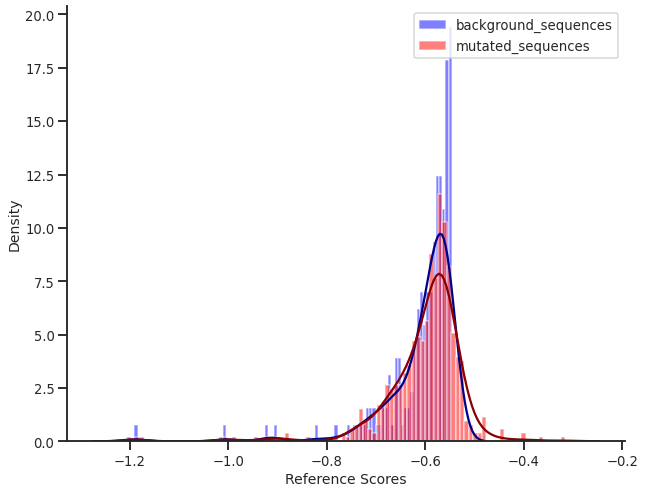

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)

background_seq = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-gata1.txt', sep='\t', 
                 names=['location','ref','allele','sequence','ref_score'])
mutated_seq = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-gata1-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq['logFC'] = mutated_seq['ref_score'] - mutated_seq['background_ref_score']
mutated_seq['position'] = np.repeat([100,150,200],200)

plt.figure(figsize=(10,8))
plt.hist(background_seq['ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="background_sequences")
plt.hist(mutated_seq['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
# plt.hist(mutated_seq['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(background_seq['ref_score'], color='darkblue')
sns.kdeplot(mutated_seq['ref_score'], color='darkred')
# sns.kdeplot(mutated_seq['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()

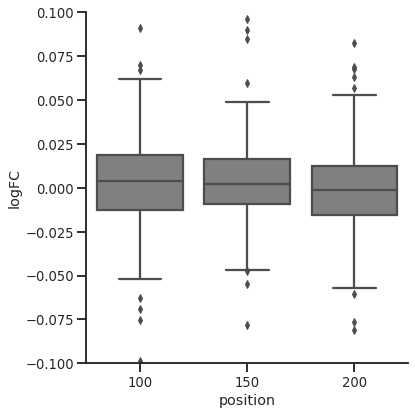

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)

# mutated_seq_with_score['bp'] = mutated_seq_with_score['bp_position'].astype(str) + '_' + mutated_seq_with_score['bp_nucleotide']

sns.boxplot(data=mutated_seq, x="position", y="logFC", color='grey')

plt.ylim(-0.1,0.1)
plt.tight_layout()  
sns.despine()
plt.show()


### Inference from inserting GATA1 motif at positions 100, 150 and 200 in the background sequence:

As expected, there weren't any significant differences between insering GATA motif in various positions in the background sequence. Also, not much change happened when the background sequence was mutated with GATA. Upon calculating the log2FC as log(mutated_seq_score)-log(background_seq_score), the range of values were in between -0.1 and 0.1 with maximum density at 0.0 indicating that for most of the mutated sequences, the mutation had very less or no effect. 

As next step, take the GATA mutated at position 150 as the background sequence/reference sequence. Then mutate each base of GATA and then calculate logFCs for every mutated base pair

Generated 600 sequences with GATA at the 150th position to be used as reference sequence by modifying the K562_GATA_enhancer_seq.py for distance = [150]. The sequences are chr1-b-150-gata1.txt and chr1-f-150-gata1.txt. 

Also run the K562_test-variants-fc.py to generate the mutated_seq reference scores the new sequences. 

In [20]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_150_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_150_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_150_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-150-gata1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-gata1-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_150_GATA_logfc.q


In [29]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-gata1-fc.txt

900 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-gata1-fc.txt


#### Modify enhancer_seq.py for positioning various mutants of the GATA motif in position 150 of the background sequences along with the positioning of the motif at various positions


In [20]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_mutate_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

### generate enhancer sequence by chromosome and save as the format of test-variant.py input file

### forward and backward sequence for GATA1 motif 

forward_gata1 = 'ACAGATAAGA' 
backward_gata1 = 'TCTTATCTGT'

### distance where the GATA1 motif need to be inserted in the background sequence

distance = 150

# step = 1
# distance = np.arange(8, 278, step)
# step = 20
# distance = np.arange(23, 244, step)

def mut_seq(seq):
    bp = ['A','G','C','T']
    new_seq = []
    for i in range(len(seq)):
        for j in range(len(bp)):
            if seq[i]!=bp[j]:
                new_seq.append(seq[:i]+ bp[j]+seq[i+1:])
            else:
                continue
                
    return new_seq
    

def mut_gen_seq(gata1,df):
    ls_loc = []
    ls_score = []
    ls_seq = []
    ls_ref = []
    ls_allele = []
    new_seq = mut_seq(gata1)

    for i in range(len(df)):
        seq = df.loc[i,'sequence']
        
        for j in range(len(new_seq)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            seq_tmp = seq[:distance-1]+new_seq[j]+seq[distance+len(new_seq[j])-1:]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            ls_ref.append('ref='+seq_tmp[distance])
            ls_allele.append(seq_tmp[distance])

    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'ref_score':ls_score
                         })

def main(ref_seq_dir,output_dir,num_seq):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

#         gen_seq(forward_gata1,df).to_csv(output_dir+'/'+chromosome+'-f-gata1.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_gata1,df).to_csv(output_dir+'/'+chromosome+'-b-gata1.txt', sep = '\t', header = None, index = False)
        
        mut_gen_seq(forward_gata1,df).to_csv(output_dir+'/'+chromosome+'-f-mut-150-gata1.txt', sep = '\t', header = None, index = False)
        mut_gen_seq(backward_gata1,df).to_csv(output_dir+'/'+chromosome+'-b-mut-150-gata1.txt', sep = '\t', header = None, index = False)


if(len(sys.argv)!=4):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> \n")
(ref_seq_dir, output_dir, num_seq)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_mutate_enhancer_seq.py


In [4]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_mutate_enhancer-seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_mutate_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 100 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_mutate_enhancer-seq.q


In [21]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/*mut-150*

   3000 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-mut-150-gata1.txt
   3000 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-mut-150-gata1.txt
   6000 total


#### Run the K562_test-variants-fc.py for the chr1-f-mut-150-gata1.txt file & chr1-b-mut-150-gata1.txt

In [29]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_150_GATA_mut_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_150_GATA_mut_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_150_GATA_mut_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-mut-150-gata1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-mut-150-gata1-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_150_GATA_mut_logfc.q


#### Forward sequences

<Figure size 576x576 with 0 Axes>

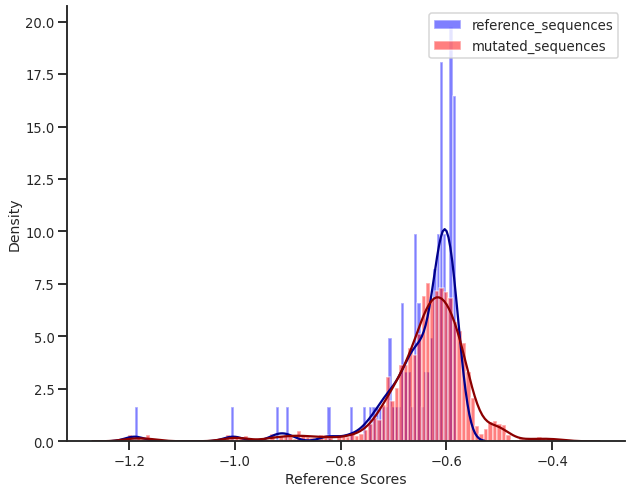

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-mut-150-gata1-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
# plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
# sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()

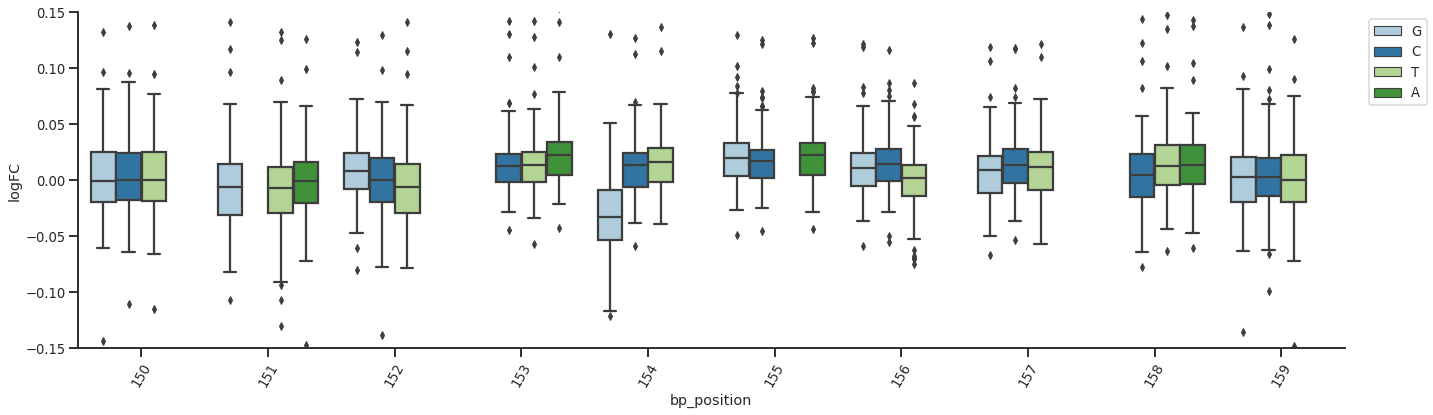

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)

mutated_seq_with_score['bp'] = mutated_seq_with_score['bp_position'].astype(str) + '_' + mutated_seq_with_score['bp_nucleotide']

sns.boxplot(data=mutated_seq_with_score, x="bp_position", y="logFC",hue='bp_nucleotide', palette='Paired')
plt.legend(loc='upper right',bbox_to_anchor=(1.07, 1))
plt.xticks(rotation=60)
plt.ylim(-0.15,0.15)
plt.tight_layout()  
sns.despine()
plt.show()

#### Backward sequences

<Figure size 576x576 with 0 Axes>

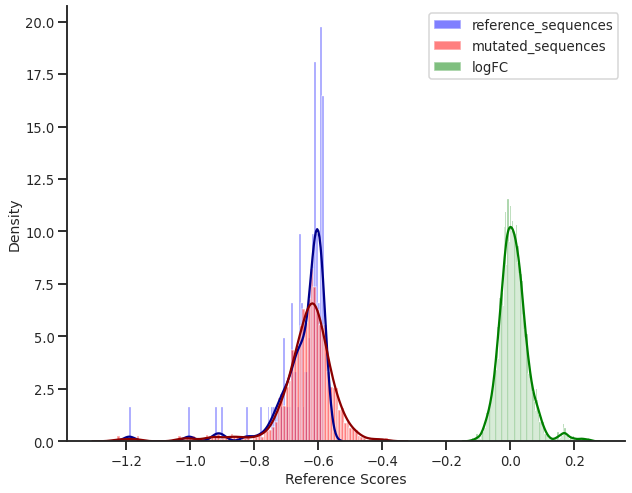

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-mut-150-gata1-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()

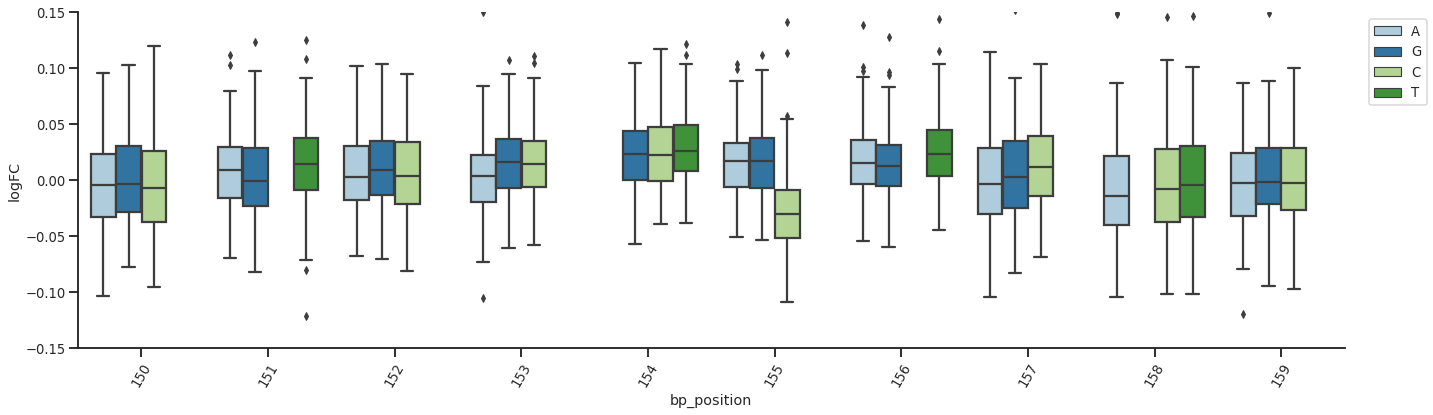

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)

mutated_seq_with_score['bp'] = mutated_seq_with_score['bp_position'].astype(str) + '_' + mutated_seq_with_score['bp_nucleotide']

sns.boxplot(data=mutated_seq_with_score, x="bp_position", y="logFC",hue='bp_nucleotide', palette='Paired')
plt.legend(loc='upper right',bbox_to_anchor=(1.07, 1))
plt.xticks(rotation=60)
plt.ylim(-0.15,0.15)
plt.tight_layout()  
sns.despine()
plt.show()

## K562 GATA-AP1 interactions

In [43]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_AP1_GATA_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

## generate enhancer sequence by chromosome and save as the format of test-variant.py input file

forward_ap1 = 'TGAGTCAT'
backward_ap1 = 'ATGACTCA'
forward_gata = 'ACAGATAAGA' 
backward_gata = 'TCTTATCTGT'

step = 20
distance = np.arange(23, 244, step)


def gen_seq(ap1,gata,df,start):
    ls_loc = []
    ls_score = []
    ls_distance = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']

        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            ls_distance.append(distance[j])
            # fix ap1, move gata
            seq_tmp = seq[:start-1]+ap1+seq[start+len(ap1)-1:start+distance[j]-1]+gata+seq[start+distance[j]-1+len(gata):]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            # fix gr, move ap1
            # ls_seq.append(seq[:start-1]+gr+seq[start+len(gr)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):])
            ls_ref.append('ref='+seq_tmp[150])
            ls_allele.append(seq_tmp[150])


    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'distance':ls_distance,
                         'score':ls_score
                         })



def main(ref_seq_dir,output_dir,num_seq,start):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_ap1,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-ap1-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(forward_ap1,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-ap1-b-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_ap1,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_ap1,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-b-gata.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=5):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> <start_pos_ap1>\n")
(ref_seq_dir, output_dir, num_seq, start)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq), int(start))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_AP1_GATA_enhancer_seq.py


In [39]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_AP1_GATA_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_AP1_GATA_enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_AP1_GATA_enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_AP1_GATA_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 50 10 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_AP1_GATA_enhancer_seq.q


In [1]:
!ls /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/*ap1*gata.txt

/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-ap1-b-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-ap1-f-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-ap1-b-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-ap1-f-gata.txt


In [13]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-ap1-b-gata.txt

600 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-ap1-b-gata.txt


In [9]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_AP1_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_AP1_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_AP1_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-ap1-b-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-ap1-b-gata-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_AP1_GATA_logfc.q


In [3]:
!mv /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-ap1-b-gata-fc.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt

In [5]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt

600 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt


<Figure size 576x576 with 0 Axes>

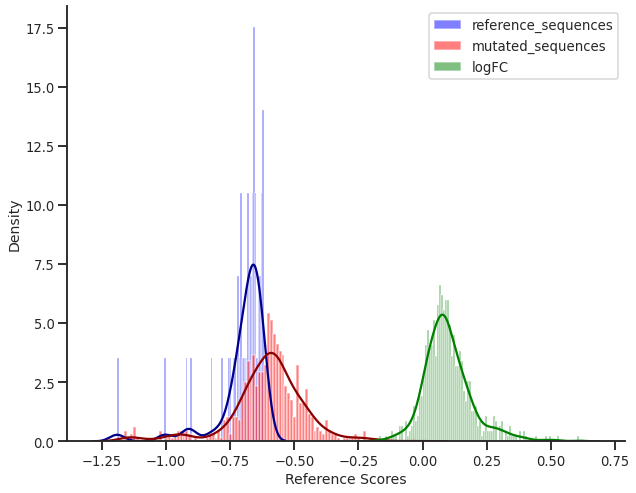

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
# mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
# mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
# mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
# mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



## Compare gata1_background to ap1_gata background

Since the interactions are modeled in a way where the ap1 is fixed at 10th position and the gata4 motif is moved to various distances - array([ 23,  43,  63,  83, 103, 123, 143, 163, 183, 203, 223, 243]), we need to create background sequences with gata4 inserted at all these above distances. These sequences are then compared to the gata+ap1 interacting sequences. 

#### create gata1_background sequences

In [23]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

## generate enhancer sequence by chromosome and save as the format of test-variant.py input file

forward_gata = 'ACAGATAAGA' 
backward_gata = 'TCTTATCTGT'

step = 20
distance = np.arange(23, 244, step)


def gen_seq(gata,df):
    ls_loc = []
    ls_score = []
    ls_distance = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']

        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            ls_distance.append(distance[j])
            # move gata
            seq_tmp = seq[:distance[j]-1]+gata+seq[distance[j]-1+len(gata):]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            # fix gr, move ap1
            # ls_seq.append(seq[:start-1]+gr+seq[start+len(gr)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):])
            ls_ref.append('ref='+seq_tmp[150])
            ls_allele.append(seq_tmp[150])


    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'distance':ls_distance,
                         'score':ls_score
                         })



def main(ref_seq_dir,output_dir,num_seq):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_gata,df).to_csv(output_dir+'/'+chromosome+'-step-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_gata,df).to_csv(output_dir+'/'+chromosome+'-step-b-gata.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-f-gata.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-b-gata.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=4):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq>\n")
(ref_seq_dir, output_dir, num_seq)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.py


In [24]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_GATA_step_enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_GATA_step_enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 50 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.q


In [14]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_GATA_step_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_GATA_step_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-step-b-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-step-b-gata-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-step-f-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-step-f-gata-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_GATA_step_enhancer_seq.q


In [29]:
import pandas as pd
import numpy as np

gata_ap1 = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt', sep='\t',
                      names=['location','ref_score','sequence','background_ref_score'])
gata_ap1['bp_position'] = np.tile(np.arange(23, 244, 20),len(gata['location'].unique()))

gata = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-step-b-gata-fc.txt', sep='\t',
                  names=['location','gata_ref_score','sequence','background_ref_score'])
gata['bp_position'] = np.tile(np.arange(23, 244, 20),len(gata['location'].unique()))

gata_ap1_combined = gata_ap1.merge(gata, on=['location','background_ref_score','bp_position'],how='inner')
gata_ap1_combined['logFC(gata/ap1_gata)'] = gata_ap1_combined['ref_score'] - gata_ap1_combined['gata_ref_score']
gata_ap1_combined
# .to_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-ap1-b-gata-fc.txt')


,location,ref_score,sequence_x,background_ref_score,bp_position,gata_ref_score,sequence_y,logFC(gata/ap1_gata)
0,chr1:1340954-1341254,-1.055379,GCACACTACATGACTCAACAGGCACACATGCATCTTATCTGTCTCA...,-1.190084,23,-1.195617,GCACACTACACACCTGCACAGGTCTTATCTGTCACCTGCATACTCA...,0.140238
1,chr1:1340954-1341254,-1.137926,GCACACTACATGACTCAACAGGCACACATGCACACCTGCATACTCA...,-1.190084,43,-1.212295,GCACACTACACACCTGCACAGGCACACATGCACACCTGCATATCTT...,0.074369
2,chr1:1340954-1341254,-1.128011,GCACACTACATGACTCAACAGGCACACATGCACACCTGCATACTCA...,-1.190084,63,-1.197904,GCACACTACACACCTGCACAGGCACACATGCACACCTGCATACTCA...,0.069894
3,chr1:1340954-1341254,-1.152251,GCACACTACATGACTCAACAGGCACACATGCACACCTGCATACTCA...,-1.190084,83,-1.253001,GCACACTACACACCTGCACAGGCACACATGCACACCTGCATACTCA...,0.100750
4,chr1:1340954-1341254,-1.109948,GCACACTACATGACTCAACAGGCACACATGCACACCTGCATACTCA...,-1.190084,103,-1.222142,GCACACTACACACCTGCACAGGCACACATGCACACCTGCATACTCA...,0.112194
...,...,...,...,...,...,...,...,...
595,chr1:17484147-17484447,-0.451177,AGCAGTCATATGACTCAACAGAGAATGAACGGTGGGGTCTGGGAGG...,-0.619644,163,-0.636319,AGCAGTCATTGAACAAAACAGAGAATGAACGGTGGGGTCTGGGAGG...,0.185143
596,chr1:17484147-17484447,-0.458045,AGCAGTCATATGACTCAACAGAGAATGAACGGTGGGGTCTGGGAGG...,-0.619644,183,-0.635557,AGCAGTCATTGAACAAAACAGAGAATGAACGGTGGGGTCTGGGAGG...,0.177512
597,chr1:17484147-17484447,-0.457020,AGCAGTCATATGACTCAACAGAGAATGAACGGTGGGGTCTGGGAGG...,-0.619644,203,-0.632816,AGCAGTCATTGAACAAAACAGAGAATGAACGGTGGGGTCTGGGAGG...,0.175796
598,chr1:17484147-17484447,-0.414790,AGCAGTCATATGACTCAACAGAGAATGAACGGTGGGGTCTGGGAGG...,-0.619644,223,-0.602455,AGCAGTCATTGAACAAAACAGAGAATGAACGGTGGGGTCTGGGAGG...,0.187665


## Inserting TAL1 and GATA4 together in the background sequence at the 150th position

Step1: modify the enhancer_seq.py code accordingly

In [13]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

### generate enhancer sequence by chromosome and save as the format of test-variant.py input file

### forward and backward sequence for TAL1 & GATA4 motif 

forward_tal1 = 'CTGG'
backward_tal1 = 'CCAG'

forward_gata1 = 'ACAGATAAGG' 
backward_gata1 = 'CCTTATCTGT'

### distance where the TAL1 & GATA4 motif need to be inserted in the background sequence

distance = 150
tal_gata_step = 5

# step = 1
# distance = np.arange(8, 278, step)
# step = 20
# distance = np.arange(23, 244, step)

    
def gen_seq(tal1,gata1,df):
    ls_loc = []
    ls_score = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']
        ls_loc.append(df.loc[i,'location'])
        ls_score.append(df.loc[i,'refScore'])
        seq_tmp = seq[:distance-1]+tal1+seq[distance+len(tal1)-1:distance+len(tal1)+tal_gata_step-1]+gata1+seq[distance+len(tal1)+tal_gata_step+len(gata1)-1:]
        if len(seq_tmp)!=300:
            raise Exception('length error')
        ls_seq.append(seq_tmp)
        ls_ref.append('ref='+seq_tmp[distance])
        ls_allele.append(seq_tmp[distance])

    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'ref_score':ls_score
                         })


def main(ref_seq_dir,output_dir,num_seq):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_tal1,forward_gata1,df).to_csv(output_dir+'/'+chromosome+'-f-150-tal1-gata4.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_tal1,backward_gata1,df).to_csv(output_dir+'/'+chromosome+'-b-150-tal1-gata4.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,forward_gr,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-f-gr.txt', sep = '\t', header = None, index = False)
#         gen_seq(backward_ap1,backward_gr,df,start).to_csv(output_dir+'/'+chromosome+'-b-ap1-b-gr.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=4):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> \n")
(ref_seq_dir, output_dir, num_seq)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_enhancer_seq.py


In [10]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 600 

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_enhancer_seq.q


In [1]:
!ls /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/*tal1*gata4*

/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-150-tal1-gata4.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-150-tal1-gata4.txt


In [12]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-150-tal1-gata4.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-tal1-gata4-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q


<Figure size 576x576 with 0 Axes>

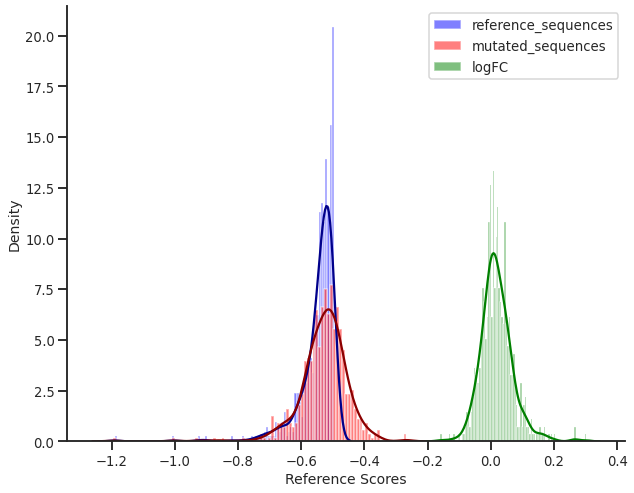

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-tal1-gata4-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
# mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
# mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
# mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
# mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



### Trying different model architecture for the same motif configuration

In [7]:
%%bash
mkdir -p /hpc/home/rv103/revathy/BlueSTARR/test/model
mkdir -p /hpc/home/rv103/revathy/BlueSTARR/test/model/K562
cp /datacommons/igvf-pm/K562/full-set/K562.config /hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/
cp /datacommons/igvf-pm/K562/full-set/K562.json /hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/
cp /datacommons/igvf-pm/K562/full-set/K562.h5 /hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/

In [10]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562.config
UseCustomLoss = 0
Tasks = K562
TaskWeights = 1
Verbose = 2
NumConvLayers = 5
KernelSizes = 8,16,32,64,128
NumKernels = 1024,512,256,128,64
MaxTrain=3000000 
MaxTest=999999999
ShouldTest=1
Epochs = 200

RevComp = 0
BatchSize = 128
EarlyStop = 10
DropoutRate = 0.5
LearningRate = 0.002
ConvResidualSkip = 0
ConvDropout = 1
ConvPad = same
DilationFactor = 1
ConvPoolSize = 1
GlobalMaxPool = 0
GlobalAvePool = 1
NumDense = 0
DenseSizes = 0
NumAttentionLayers = 5
AttentionHeads = 32,32,32,32,32
AttentionKeyDim = 1024,1024,1024,1024,1024
AttentionResidualSkip = 0

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562.config


In [11]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-150-tal1-gata4.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-tal1-gata4-attention-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q


<Figure size 576x576 with 0 Axes>

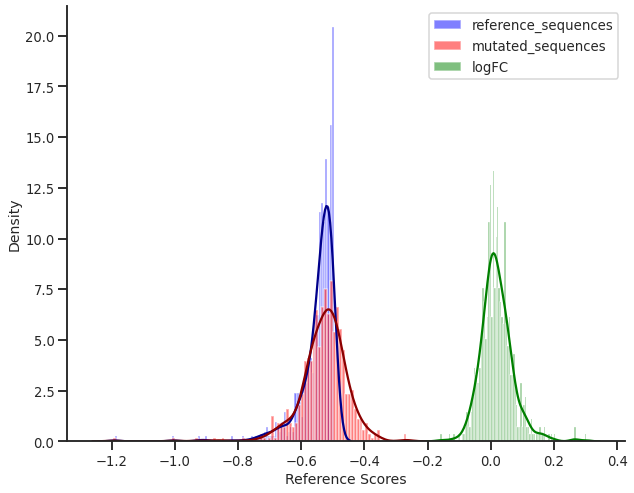

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-150-tal1-gata4-attention-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
# mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
# mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
# mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
# mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



### TAL-GATA-AP1 interactions

In [16]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_AP1_enhancer_seq.py
import pandas as pd
import numpy as np
import sys
import os

## generate enhancer sequence by chromosome and save as the format of test-variant.py input file

forward_ap1 = 'TGAGTCAT'
backward_ap1 = 'ATGACTCA'

forward_tal1 = 'CTGG'
backward_tal1 = 'CCAG'

forward_gata1 = 'ACAGATAAGG' 
backward_gata1 = 'CCTTATCTGT'

step = 20
tal_gata_step=5
distance = np.arange(23, 244, step)


def gen_seq(tal1,gata1,ap1,df,start):
    ls_loc = []
    ls_score = []
    ls_distance = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']

        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            ls_distance.append(distance[j])
            # fix tal-gata-complex, move ap1
            
            tal_gata = tal1+seq[distance[j]+len(tal1)-1:distance[j]+len(tal1)+tal_gata_step-1]+gata1
            seq_tmp = seq[:start-1]+tal_gata+seq[start+len(tal_gata)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):]
            
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            # fix gr, move ap1
            # ls_seq.append(seq[:start-1]+gr+seq[start+len(gr)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):])
            ls_ref.append('ref='+seq_tmp[150])
            ls_allele.append(seq_tmp[150])


    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'distance':ls_distance,
                         'score':ls_score
                         })



def main(ref_seq_dir,output_dir,num_seq,start):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_tal1,forward_gata1,forward_ap1,df,start).to_csv(output_dir+'/'+chromosome+'-f-tal_gata-f-ap1.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_tal1,backward_gata1,forward_ap1,df,start).to_csv(output_dir+'/'+chromosome+'-b-tal_gata-f-ap1.txt', sep = '\t', header = None, index = False)
        gen_seq(forward_tal1,forward_gata1,backward_ap1,df,start).to_csv(output_dir+'/'+chromosome+'-f-tal_gata-b-ap1.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_tal1,backward_gata1,backward_ap1,df,start).to_csv(output_dir+'/'+chromosome+'-b-tal_gata-b-ap1.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=5):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> <start_pos_ap1>\n")
(ref_seq_dir, output_dir, num_seq, start)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq), int(start))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_AP1_enhancer_seq.py


In [2]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_AP1_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_enhancer_seq.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_enhancer_seq.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_AP1_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 600 10 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_AP1_enhancer_seq.q


In [5]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-f-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-f-ap1-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-b-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-b-ap1-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-f-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-f-ap1-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-b-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-b-ap1-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_logfc.q


In [7]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_logfc_v1.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_logfc.err

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-b-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-b-ap1-fc.txt

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_logfc_v1.q


In [13]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-f-ap1-fc.txt

7200 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-f-ap1-fc.txt


In [15]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-f-ap1.txt

7200 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-f-ap1.txt


#### ANOVA to test between the different step positions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
# plt.figure(figsize=(8,8))

# sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
# sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-b-ap1-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','position'])
background_sequence = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-b-ap1.txt', sep='\t',
                                 names=['location','ref_allele','allele','sequence','position','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - background_sequence['background_ref_score']

# for i in mutated_seq_with_score.position.unique():
#     group_mutated_seq_with_score[mutated_seq_with_score['position']==23]

model = ols('logFC ~ position', data=mutated_seq_with_score).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

             sum_sq      df          F        PR(>F)
position   3.478100     1.0  259.42285  2.287663e-57
Residual  96.504093  7198.0        NaN           NaN


#### Interactions with attention layer

In [1]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_attention_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_attention_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_AP1_attention_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-f-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-f-ap1-attention-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-b-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-b-ap1-attention-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-tal_gata-f-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-f-ap1-attention-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/hpc/home/rv103/revathy/BlueSTARR/test/model/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal_gata-b-ap1.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-b-ap1-attention-fc.txt

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_AP1_attention_logfc.q


In [4]:
import numpy as np
step = 20
distance = np.arange(23, 244, step)

distance

array([ 23,  43,  63,  83, 103, 123, 143, 163, 183, 203, 223, 243])

In [8]:
!ls /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/*tal*gata*ap1*attention*

/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-b-ap1-attention-fc.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal_gata-f-ap1-attention-fc.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-b-ap1-attention-fc.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal_gata-f-ap1-attention-fc.txt


## TAL and GATA interations

Increasing the distance between TAL1 and GATA4

In [1]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_enhancer_seq_v2.py

""" This script explores the TAL1 GATA interation in the TAL1_GATA complex when the distance between TAL and GATA is varied"""

import pandas as pd
import numpy as np
import sys
import os

## generate enhancer sequence by chromosome and save as the format of test-variant.py input file

forward_tal1 = 'CTGG'
backward_tal1 = 'CCAG'

forward_gata = 'ACAGATAAGG' 
backward_gata = 'CCTTATCTGT'

step = 1
distance = np.arange(6, 16, step)


def gen_seq(tal1,gata,df,start):
    ls_loc = []
    ls_score = []
    ls_distance = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']

        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            ls_distance.append(distance[j])
            # fix ap1, move gata
            seq_tmp = seq[:start-1]+tal1+seq[start+len(tal1)-1:start+distance[j]-1]+gata+seq[start+distance[j]-1+len(gata):]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            # fix gr, move ap1
            # ls_seq.append(seq[:start-1]+gr+seq[start+len(gr)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):])
            ls_ref.append('ref='+seq_tmp[150])
            ls_allele.append(seq_tmp[150])


    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'distance':ls_distance,
                         'score':ls_score
                         })



def main(ref_seq_dir,output_dir,num_seq,start):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_tal1,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-tal1-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(forward_tal1,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-tal1-b-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_tal1,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-tal1-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_tal1,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-tal1-b-gata.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=5):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> <start_pos_ap1>\n")
(ref_seq_dir, output_dir, num_seq, start)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq), int(start))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_enhancer_seq_v2.py


In [2]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_enhancer_seq_v2.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_enhancer_seq_v2.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_enhancer_seq_v2.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_enhancer_seq_v2.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 600 150 

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_TAL_GATA_enhancer_seq_v2.q


In [5]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py  \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-tal1-f-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-tal1-f-gata-fc.txt

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_TAL_GATA_logfc.q


In [1]:
!wc -l /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal1-f-gata-fc.txt

600 /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-tal1-f-gata-fc.txt


### Interaction between GATA4 and RUNX4

In [5]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_RUNX_GATA_enhancer_seq.py

""" This script explores the TAL1 GATA interation in the TAL1_GATA complex when the distance between RUNX4 and GATA4 is varied"""

import pandas as pd
import numpy as np
import sys
import os

## generate enhancer sequence by chromosome and save as the format of test-variant.py input file

forward_runx = 'TTTGTGGTTT'
backward_runx = 'AAACCACAAA'

forward_gata = 'ACAGATAAGG' 
backward_gata = 'CCTTATCTGT'

step = 20
distance = np.arange(23, 244, step)


def gen_seq(runx,gata,df,start):
    ls_loc = []
    ls_score = []
    ls_distance = []
    ls_seq = []
    ls_ref = []
    ls_allele = []

    for i in range(len(df)):
        seq = df.loc[i,'sequence']

        for j in range(len(distance)):
            ls_loc.append(df.loc[i,'location'])
            ls_score.append(df.loc[i,'refScore'])
            ls_distance.append(distance[j])
            # fix ap1, move gata
            seq_tmp = seq[:start-1]+runx+seq[start+len(runx)-1:start+distance[j]-1]+gata+seq[start+distance[j]-1+len(gata):]
            if len(seq_tmp)!=300:
                raise Exception('length error')
            ls_seq.append(seq_tmp)
            # fix gr, move ap1
            # ls_seq.append(seq[:start-1]+gr+seq[start+len(gr)-1:start+distance[j]-1]+ap1+seq[start+distance[j]-1+len(ap1):])
            ls_ref.append('ref='+seq_tmp[150])
            ls_allele.append(seq_tmp[150])


    return pd.DataFrame({'location':ls_loc,
                         'ref':ls_ref,
                         'allele':ls_allele,
                         'sequence':ls_seq,
                         'distance':ls_distance,
                         'score':ls_score
                         })



def main(ref_seq_dir,output_dir,num_seq,start):

    ref_seq_files = [f for f in os.listdir(ref_seq_dir) if f.endswith('.txt')]
    for ref_seq in ref_seq_files:
        chromosome = ref_seq.split('.')[0]

        df = pd.read_csv(ref_seq_dir+'/'+ref_seq, sep='\t', header=None)
        df.columns = ['location','refScore','sequence']
        df = df.sort_values(by = 'refScore')
        df = df.reset_index(drop = True)
        df = df.iloc[:num_seq,:]

        gen_seq(forward_runx,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-runx4-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(forward_runx,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-f-runx4-b-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_runx,forward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-runx4-f-gata.txt', sep = '\t', header = None, index = False)
        gen_seq(backward_runx,backward_gata,df,start).to_csv(output_dir+'/'+chromosome+'-b-runx4-b-gata.txt', sep = '\t', header = None, index = False)

if(len(sys.argv)!=5):
    exit(ProgramName.get()+" <ref_seq_score_dir> <output_dir> <num_seq> <start_pos_ap1>\n")
(ref_seq_dir, output_dir, num_seq, start)=sys.argv[1:]
main(ref_seq_dir, output_dir, int(num_seq), int(start))

Overwriting /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_RUNX_GATA_enhancer_seq.py


In [4]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_RUNX_GATA_enhancer_seq.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J runx_gata_enhancer_seq
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_enhancer_seq_v2.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_TAL_GATA_enhancer_seq_v2.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_RUNX_GATA_enhancer_seq.py \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/ref_score \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq 50 10 

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/BlueSTARR/K562_RUNX_GATA_enhancer_seq.q


In [6]:
!ls /hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/*runx*

/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-runx4-b-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-runx4-f-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-runx4-b-gata.txt
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-runx4-f-gata.txt


In [7]:
%%writefile /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_RUNX_GATA_logfc.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J runx_logfc
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p majoroslab-gpu,scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_RUNX_GATA_logfc.out
#SBATCH -e /hpc/home/rv103/revathy/BlueSTARR/test/logs/K562_RUNX_GATA_logfc.err
#
python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-runx4-f-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-runx4-f-gata-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-runx4-b-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-runx4-b-gata-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-b-runx4-f-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-b-runx4-f-gata-fc.txt

python /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_test-variants-fc.py \
/datacommons/igvf-pm/K562/full-set/K562 \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/generated-seq/chr1-f-runx4-b-gata.txt \
/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-runx4-b-gata-fc.txt

Writing /hpc/home/rv103/revathy/BlueSTARR/test/scripts/K562_RUNX_GATA_logfc.q


<Figure size 576x576 with 0 Axes>

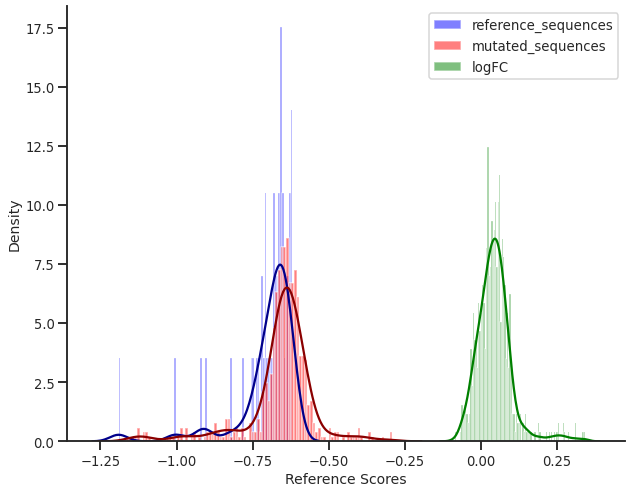

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("talk", font_scale=0.8)


mutated_seq_with_score = pd.read_csv('/hpc/home/rv103/revathy/BlueSTARR/test/data/K562/logfc/chr1-f-runx4-f-gata-fc.txt', sep='\t', 
                 names=['location','ref_score','sequence','background_ref_score'])

mutated_seq_with_score['logFC'] = mutated_seq_with_score['ref_score'] - mutated_seq_with_score['background_ref_score']
# mutated_seq_with_score['gata_sequence'] = mutated_seq_with_score['sequence'].str[149:159]
# mutated_seq_with_score['bp_position'] = np.tile(np.repeat(np.arange(150,160),3),len(mutated_seq_with_score['location'].unique()))
# mutated_seq_with_score['bp_nucleotide'] = [sequence[bp_position-1] for sequence, bp_position in zip(mutated_seq_with_score['sequence'], mutated_seq_with_score['bp_position'])]
# mutated_seq_with_score

plt.figure(figsize=(10,8))
plt.hist(mutated_seq_with_score['background_ref_score'], density=True, bins=100, alpha=0.5,  color='blue', label="reference_sequences")
plt.hist(mutated_seq_with_score['ref_score'], density=True, bins=100, alpha=0.5, color='red', label="mutated_sequences")
plt.hist(mutated_seq_with_score['logFC'], density=True, bins=100, alpha=0.5,  color='green', label="logFC")
sns.kdeplot(mutated_seq_with_score['background_ref_score'], color='darkblue')
sns.kdeplot(mutated_seq_with_score['ref_score'], color='darkred')
sns.kdeplot(mutated_seq_with_score['logFC'], color='green')
plt.xlabel("Reference Scores", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()



In [1]:
%%writefile /hpc/home/rv103/revathy/cbb520/genome_tools/amino_acid_pair_analysis.q
#!/bin/sh
#
#SBATCH --get-user-env
#SBATCH -J aa_analysis
#SBATCH --mail-user=rv103@duke.edu
#SBATCH --mail-type=END,FAIL
#SBATCH --gres=gpu:1
#SBATCH -p scavenger-gpu
#SBATCH --nice=100
#SBATCH --mem=102400
#SBATCH --cpus-per-task=1
#SBATCH -o /hpc/home/rv103/revathy/cbb520/amino_acid_pairs_analysis-subset-v1.out
#SBATCH -e /hpc/home/rv103/revathy/cbb520/amino_acid_pairs_analysis-subset-v1.err

python /hpc/home/rv103/revathy/cbb520/genome_tools/amino_acid_pair_analysis.py 

Writing /hpc/home/rv103/revathy/cbb520/genome_tools/amino_acid_pair_analysis.q
